In [2]:
import numpy as np
import pandas as pd
import pylab as pl
import networkx as nx

<function matplotlib.pyplot.show(close=None, block=None)>

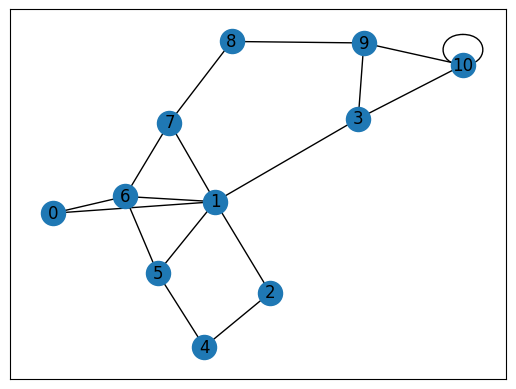

In [3]:
#draw the graph
edges=[(0,1),(1,5),(1,6),(5,6),(5,4),(1,2),(1,3),(9,10),(10,10),(2,4),(0,6),(6,7),(8,9),(7,8),(1,7),(3,9),(10,3)]
G=nx.Graph()
G.add_edges_from(edges)
pos=nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)  #declares the node of the graph
nx.draw_networkx_edges(G,pos) 
nx.draw_networkx_labels(G,pos)
pl.show

In [4]:
#read matrix
matrix_size=11
goal=3
R=np.matrix(np.ones(shape=(matrix_size,matrix_size)))

In [5]:
R*=-1

In [6]:
R

matrix([[-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.]])

In [7]:
for point in edges:
    if(point[1]==goal): #forward case of edges
        R[point]=100
    else:
        R[point]=0
    if(point[0]==goal): #reverse case of edges
        R[point[::-1]]=100
    else:
        R[point[::-1]]=0

#R[goal,goal]=100    #write only when uh have self loopS
print(R)

[[ -1.   0.  -1.  -1.  -1.  -1.   0.  -1.  -1.  -1.  -1.]
 [  0.  -1.   0. 100.  -1.   0.   0.   0.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.  -1.   0.   0.]
 [ -1.  -1.   0.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.   0.  -1.   0.  -1.  -1.  -1.  -1.]
 [  0.   0.  -1.  -1.  -1.   0.  -1.   0.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.  -1.  -1.   0.  -1.   0.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.   0.  -1.   0.  -1.]
 [ -1.  -1.  -1. 100.  -1.  -1.  -1.  -1.   0.  -1.   0.]
 [ -1.  -1.  -1. 100.  -1.  -1.  -1.  -1.  -1.   0.   0.]]


In [8]:
#define Q matrix
Q=np.matrix(np.zeros([matrix_size,matrix_size]))
gamma=0.75
initial_state=1

In [9]:
def available_states(state):
    all_options=R[state,]
    available_options=np.where(all_options>=0)[1]
    return(available_options)

In [10]:
all_connections=available_states(initial_state)

In [11]:
all_connections

array([0, 2, 3, 5, 6, 7], dtype=int64)

In [12]:
def choose_next_state(all_connections):
    next_state=int(np.random.choice(all_connections,1))
    return next_state

In [13]:
action=choose_next_state(all_connections)

In [14]:
action

2

In [15]:
def Q_update(gamma,initial_state,action):
   max_index= np.where(Q[action,]==np.max(Q[action,]))[1]
   if(max_index.shape[0]>1):
      max_index=int(np.random.choice(max_index,1))
   else:
      max_index=int(max_index)
   max_value=Q[action,max_index]   
   Q[initial_state,action]=R[initial_state,action]+gamma*max_value

   if(np.max(Q)>0):
      return(np.sum(Q/np.max(Q)))
   else:
      return(0)

In [16]:
print("before updation of Q")
print(Q)
Q_update(gamma,initial_state,action)
print("after updation of Q value")
print(Q)

before updation of Q
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
after updation of Q value
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [17]:
scores=[]

for i in range(1000):
    initial_state=int(np.random.randint(0,Q.shape[0]))
    all_connections=available_states(initial_state)
    action=choose_next_state(all_connections)
    score=Q_update(gamma,initial_state,action)
    scores.append(score)
print(Q)

[[  0.         171.42845547   0.           0.           0.
    0.         128.5713416    0.           0.           0.
    0.        ]
 [128.5713416    0.         128.5713416  228.57127396   0.
  128.57055984 128.5713416  128.57055984   0.           0.
    0.        ]
 [  0.         171.42845547   0.           0.          96.4285062
    0.           0.           0.           0.           0.
    0.        ]
 [  0.         171.42845547   0.           0.           0.
    0.           0.           0.           0.         171.42853474
  171.42855079]
 [  0.           0.         128.5713416    0.           0.
  128.5713416    0.           0.           0.           0.
    0.        ]
 [  0.         171.42845547   0.           0.          96.4285062
    0.         128.5713416    0.           0.           0.
    0.        ]
 [128.57055984 171.42845547   0.           0.           0.
  128.5713416    0.         128.5713416    0.           0.
    0.        ]
 [  0.         171.42845547   0.        

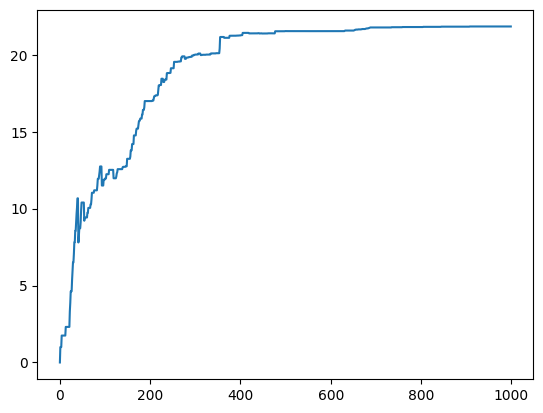

In [18]:
pl.plot(scores)

In [19]:
#Testing Phase

steps=[]
initial_state=0
goal=2
steps=[initial_state]
while initial_state!=goal:
    next_index=np.where(Q[initial_state,]==np.max(Q[initial_state]))[1]
    if (next_index.shape[0]>1):
        next_index=int(np.random.choice(next_index,1))
    else:
        next_index=int(next_index)
    steps.append(next_index)
    initial_state=next_index
print(steps)